<a href="https://colab.research.google.com/github/hargurjeet/Suprise_Housing/blob/main/Suprise_Housing_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Suprise House Pricing Case Study**

The case study provide a detailed analysis of housing prices within Australia and how Suprise Housing company leverage this information to buy houses at low prices and sell them at high prices

  # **Table Of Contents**<a name="top"></a>


---



---

  
  1. [About the Dataset](#1)
  2. [Data Understanding](#2)
  3. [Expainatory Data Analysis](#3)
  4. [Data Prepartion](#4)
  5. [Model Building and Evaluations](#5)
  6. [Summary & Conclusion](#6)
  7. [References](#7)

# 1: AboutDataset <a name="1"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

The dataset contains around 1500 records covering various details of house prices along with it sales/house pricing information.

In [1]:
## Data preprocessing libraries
import pandas as pd
import numpy as np
from numpy import arange

## Libraries for building visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# libraries for data preprocessing
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Libraries for building ML models
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Libraries for Model Evaluations
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Libraries for hyperparameter tuning
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

# Libraries to supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
input_url = 'https://raw.githubusercontent.com/hargurjeet/Suprise_Housing/main/train.csv'
raw_data = pd.read_csv(input_url)
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2: Data Understanding <a name="2"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Key observation** - 
- No nul values within the dataset. Few columns seems to have extermely high number of null values.
- High number of both Categorical and numberica columns.

# 3: Explainatory Data Analysis <a name="3"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [4]:
# Identifying and removing columns having missing values over 40%
pd.set_option('display.max_rows', None)
columns_with_high_missing_values = raw_data.columns[[((raw_data.isnull().sum()/len(raw_data))*100 > 40)]]
columns_with_high_missing_values

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [5]:
print('Total number of columns within the dataset', len(raw_data.columns))
raw_data = raw_data.drop(labels=columns_with_high_missing_values, axis=1)

# Id colums seems to be irrelevant as well
raw_data = raw_data.drop(labels='Id', axis=1)
print('Total number of columns left after dropping the columns', len(raw_data.columns))

Total number of columns within the dataset 81
Total number of columns left after dropping the columns 75


In [6]:
# As total number of columns are pretty high
# let us identify the numberical and categorical columns
raw_data_numberic = raw_data.select_dtypes(include=['number'])
raw_data_cat = raw_data.select_dtypes(include=['object'])
print('Total numberic columns', len(raw_data_numberic.columns))
print('Total categorical columns', len(raw_data_cat.columns))

Total numberic columns 37
Total categorical columns 38


In [7]:
# Analysing Numberical columns
raw_data_numberic.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


## Univarite Analysis

### Univarite analysis Quantitavie **variables**

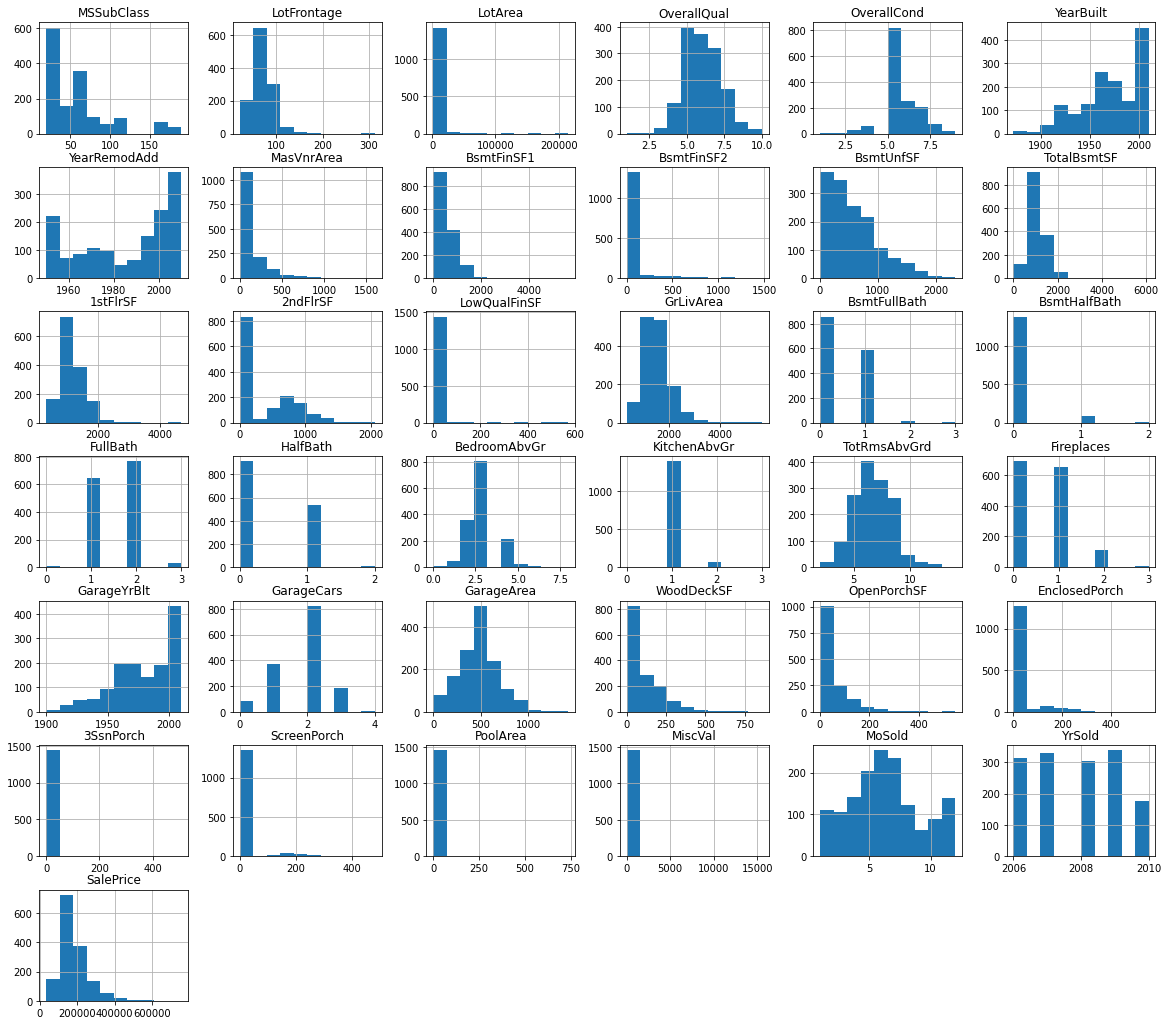

In [8]:
raw_data_numberic.hist(figsize=(20,18))
plt.show()

** - Key obervations **
- For few columns most of the values seems zero. They are  'BsmtFinSF2', 'LowQualFinSF','EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal'. As these columns doesnt contain much info I plan to drop these columns

- Few columns can be categorised as catergory columns as they done contain continous values they are - 'BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath', 'KitchenAbvGr','Fireplaces', 'GarageCars','YrSold'

In [9]:
# adding colums to categorical data
cat_cols =['BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath', 'KitchenAbvGr','Fireplaces', 'GarageCars','YrSold']
raw_data_cat = pd.concat([raw_data_cat,raw_data_numberic[cat_cols]], axis=1 )
# changing the datatype to object as they are not maintained as categorical data
raw_data_cat[cat_cols] = raw_data_cat[cat_cols].astype(object)

# Implementing the above observations
drop_cols =['BsmtFinSF2', 'LowQualFinSF','EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal']
raw_data_numberic.drop(columns = drop_cols + cat_cols, inplace=True)

In [10]:
print('Total numberic columns', len(raw_data_numberic.columns))
print('Total categorical columns', len(raw_data_cat.columns))

Total numberic columns 22
Total categorical columns 46


### Univarite analysis Categorical variables

In [11]:
raw_data_cat.shape

(1460, 46)

In [12]:
raw_data_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces',
       'GarageCars', 'YrSold'],
      dtype='object')

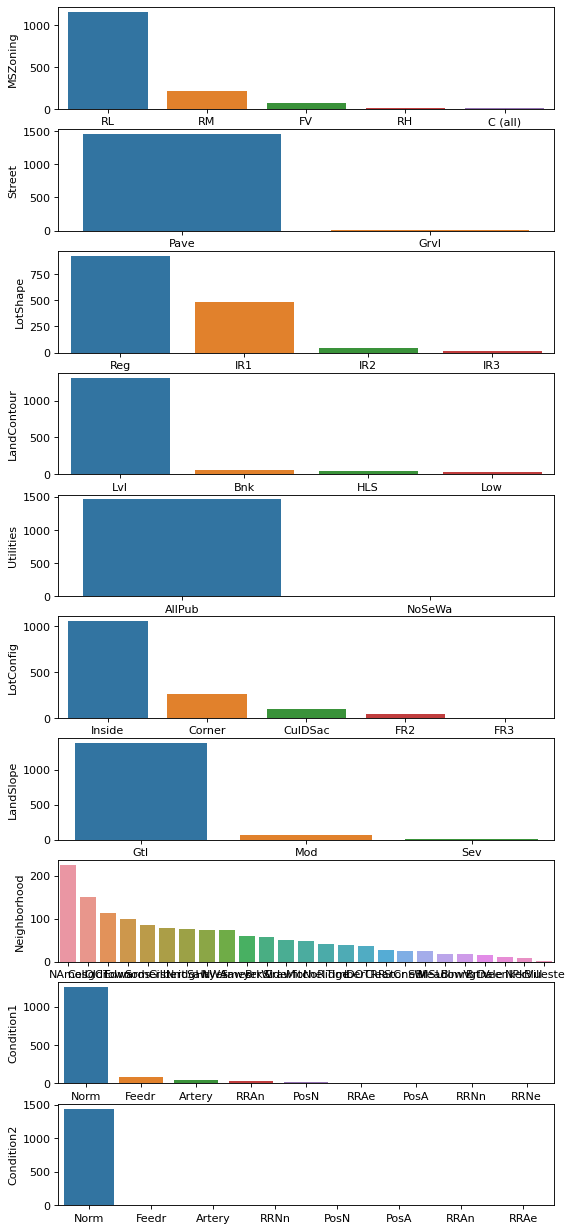

In [13]:
figure(figsize=(8, 40), dpi=80)
# plt.figure(bbox_inches='tight',dpi=100)

# fig, axs = plt.subplots(2, 2) 
plt.subplot(20, 1, 1)
sns.barplot(x = raw_data_cat.MSZoning.value_counts().index, y = raw_data_cat.MSZoning.value_counts())

plt.subplot(20, 1, 2)
sns.barplot(x = raw_data_cat.Street.value_counts().index, y = raw_data_cat.Street.value_counts())

plt.subplot(20, 1, 3)
sns.barplot(x = raw_data_cat.LotShape.value_counts().index, y = raw_data_cat.LotShape.value_counts())

plt.subplot(20, 1, 4)
sns.barplot(x = raw_data_cat.LandContour.value_counts().index, y = raw_data_cat.LandContour.value_counts())

plt.subplot(20, 1, 5)
sns.barplot(x = raw_data_cat.Utilities.value_counts().index, y = raw_data_cat.Utilities.value_counts())

plt.subplot(20, 1, 6)
sns.barplot(x = raw_data_cat.LotConfig.value_counts().index, y = raw_data_cat.LotConfig.value_counts())

plt.subplot(20, 1, 7)
sns.barplot(x = raw_data_cat.LandSlope.value_counts().index, y = raw_data_cat.LandSlope.value_counts())

plt.subplot(20, 1, 8)
sns.barplot(x = raw_data_cat.Neighborhood.value_counts().index, y = raw_data_cat.Neighborhood.value_counts())

plt.subplot(20, 1, 9)
sns.barplot(x = raw_data_cat.Condition1.value_counts().index, y = raw_data_cat.Condition1.value_counts())

plt.subplot(20, 1, 10)
sns.barplot(x = raw_data_cat.Condition2.value_counts().index, y = raw_data_cat.Condition2.value_counts())
plt.show()



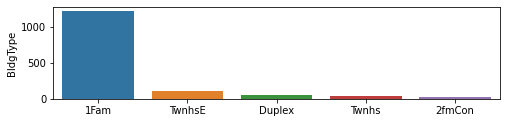

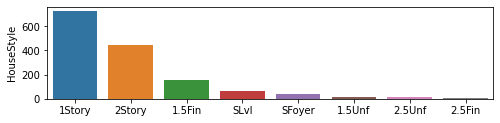

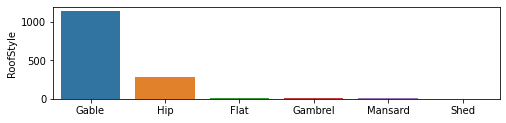

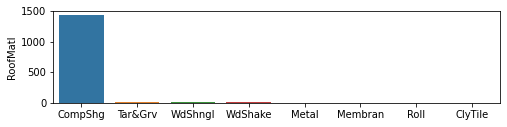

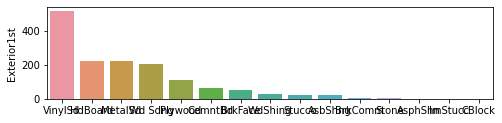

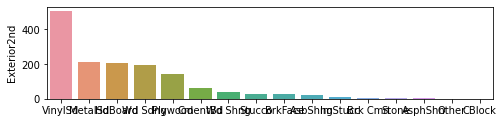

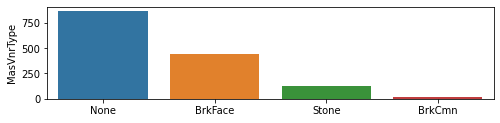

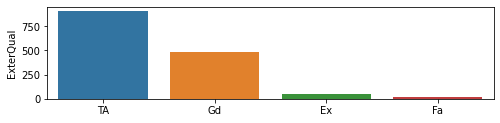

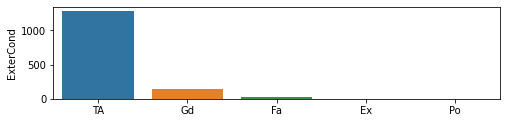

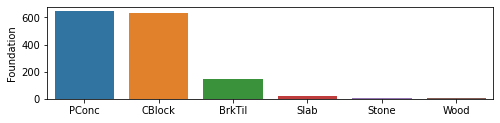

In [14]:
# figure(figsize=(8, 40), dpi=80)
plt.rcParams["figure.figsize"] = (8,20)
plt.subplot(10, 1, 1)
sns.barplot(x = raw_data_cat.BldgType.value_counts().index, y = raw_data_cat.BldgType.value_counts())
plt.show()

plt.subplot(10, 1, 2)
sns.barplot(x = raw_data_cat.HouseStyle.value_counts().index, y = raw_data_cat.HouseStyle.value_counts())
plt.show()

plt.subplot(10, 1, 3)
sns.barplot(x = raw_data_cat.RoofStyle.value_counts().index, y = raw_data_cat.RoofStyle.value_counts())
plt.show()

plt.subplot(10, 1, 4)
sns.barplot(x = raw_data_cat.RoofMatl.value_counts().index, y = raw_data_cat.RoofMatl.value_counts())
plt.show()

plt.subplot(10, 1, 5)
sns.barplot(x = raw_data_cat.Exterior1st.value_counts().index, y = raw_data_cat.Exterior1st.value_counts())
plt.show()

plt.subplot(10, 1, 6)
sns.barplot(x = raw_data_cat.Exterior2nd.value_counts().index, y = raw_data_cat.Exterior2nd.value_counts())
plt.show()

plt.subplot(10, 1, 7)
sns.barplot(x = raw_data_cat.MasVnrType.value_counts().index, y = raw_data_cat.MasVnrType.value_counts())
plt.show()

plt.subplot(10, 1, 8)
sns.barplot(x = raw_data_cat.ExterQual.value_counts().index, y = raw_data_cat.ExterQual.value_counts())
plt.show()

plt.subplot(10, 1, 9)
sns.barplot(x = raw_data_cat.ExterCond.value_counts().index, y = raw_data_cat.ExterCond.value_counts())
plt.show()

plt.subplot(10, 1, 10)
sns.barplot(x = raw_data_cat.Foundation.value_counts().index, y = raw_data_cat.Foundation.value_counts())
plt.show()

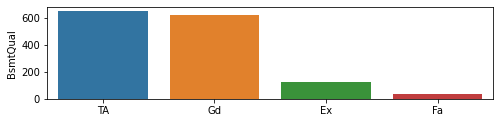

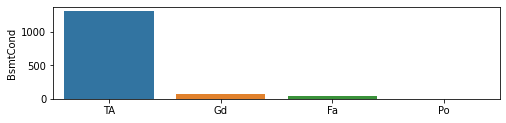

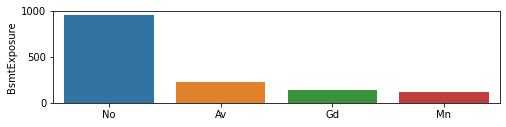

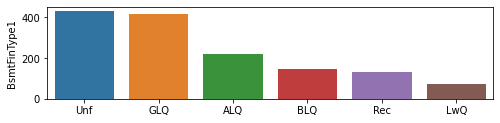

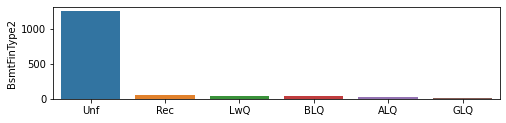

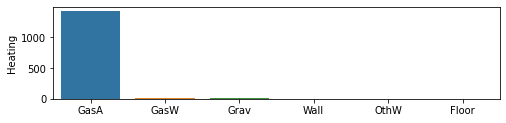

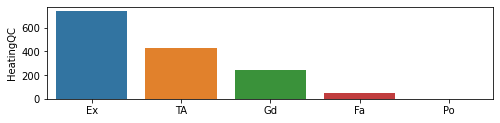

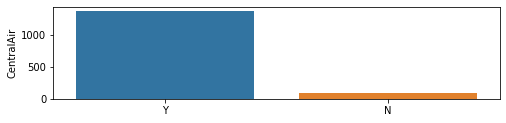

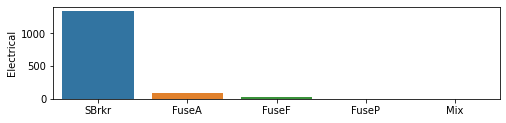

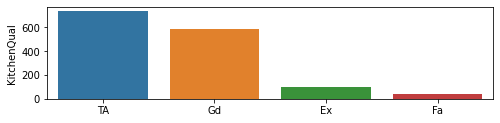

In [15]:
# figure(figsize=(8, 40), dpi=80)
plt.rcParams["figure.figsize"] = (8,20)
plt.subplot(10, 1, 1)
sns.barplot(x = raw_data_cat.BsmtQual.value_counts().index, y = raw_data_cat.BsmtQual.value_counts())
plt.show()

plt.subplot(10, 1, 2)
sns.barplot(x = raw_data_cat.BsmtCond.value_counts().index, y = raw_data_cat.BsmtCond.value_counts())
plt.show()

plt.subplot(10, 1, 3)
sns.barplot(x = raw_data_cat.BsmtExposure.value_counts().index, y = raw_data_cat.BsmtExposure.value_counts())
plt.show()

plt.subplot(10, 1, 4)
sns.barplot(x = raw_data_cat.BsmtFinType1.value_counts().index, y = raw_data_cat.BsmtFinType1.value_counts())
plt.show()

plt.subplot(10, 1, 5)
sns.barplot(x = raw_data_cat.BsmtFinType2.value_counts().index, y = raw_data_cat.BsmtFinType2.value_counts())
plt.show()

plt.subplot(10, 1, 6)
sns.barplot(x = raw_data_cat.Heating.value_counts().index, y = raw_data_cat.Heating.value_counts())
plt.show()

plt.subplot(10, 1, 7)
sns.barplot(x = raw_data_cat.HeatingQC.value_counts().index, y = raw_data_cat.HeatingQC.value_counts())
plt.show()

plt.subplot(10, 1, 8)
sns.barplot(x = raw_data_cat.CentralAir.value_counts().index, y = raw_data_cat.CentralAir.value_counts())
plt.show()

plt.subplot(10, 1, 9)
sns.barplot(x = raw_data_cat.Electrical.value_counts().index, y = raw_data_cat.Electrical.value_counts())
plt.show()

plt.subplot(10, 1, 10)
sns.barplot(x = raw_data_cat.KitchenQual.value_counts().index, y = raw_data_cat.KitchenQual.value_counts())
plt.show()

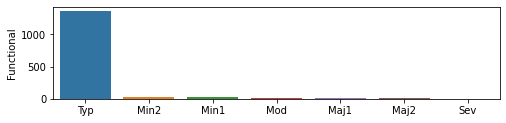

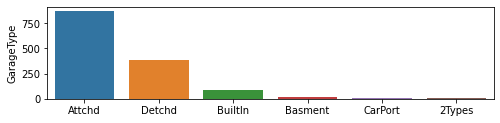

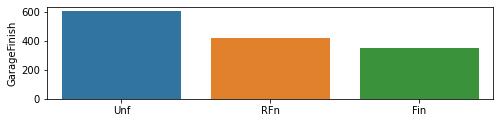

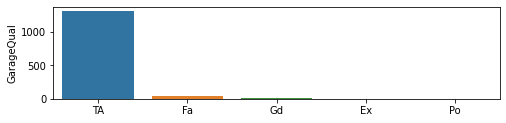

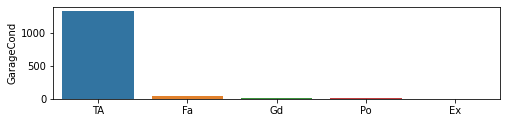

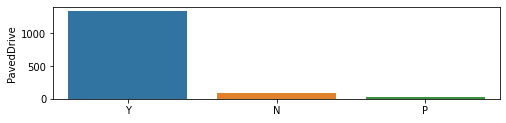

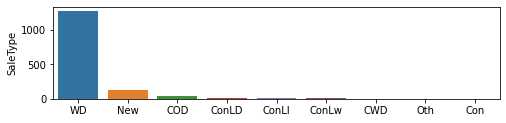

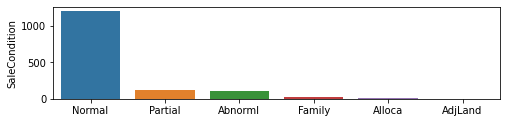

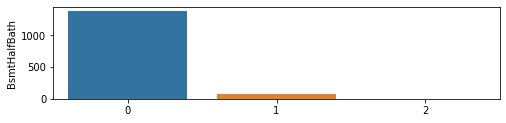

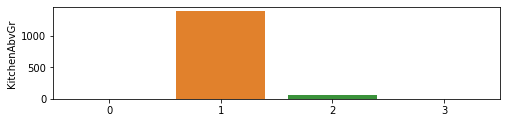

In [16]:
# figure(figsize=(8, 40), dpi=80)
plt.rcParams["figure.figsize"] = (8,20)
plt.subplot(10, 1, 1)
sns.barplot(x = raw_data_cat.Functional.value_counts().index, y = raw_data_cat.Functional.value_counts())
plt.show()

plt.subplot(10, 1, 2)
sns.barplot(x = raw_data_cat.GarageType.value_counts().index, y = raw_data_cat.GarageType.value_counts())
plt.show()

plt.subplot(10, 1, 3)
sns.barplot(x = raw_data_cat.GarageFinish.value_counts().index, y = raw_data_cat.GarageFinish.value_counts())
plt.show()

plt.subplot(10, 1, 4)
sns.barplot(x = raw_data_cat.GarageQual.value_counts().index, y = raw_data_cat.GarageQual.value_counts())
plt.show()

plt.subplot(10, 1, 5)
sns.barplot(x = raw_data_cat.GarageCond.value_counts().index, y = raw_data_cat.GarageCond.value_counts())
plt.show()

plt.subplot(10, 1, 6)
sns.barplot(x = raw_data_cat.PavedDrive.value_counts().index, y = raw_data_cat.PavedDrive.value_counts())
plt.show()

plt.subplot(10, 1, 7)
sns.barplot(x = raw_data_cat.SaleType.value_counts().index, y = raw_data_cat.SaleType.value_counts())
plt.show()

plt.subplot(10, 1, 8)
sns.barplot(x = raw_data_cat.SaleCondition.value_counts().index, y = raw_data_cat.SaleCondition.value_counts())
plt.show()

plt.subplot(10, 1, 9)
sns.barplot(x = raw_data_cat.BsmtHalfBath.value_counts().index, y = raw_data_cat.BsmtHalfBath.value_counts())
plt.show()

plt.subplot(10, 1, 10)
sns.barplot(x = raw_data_cat.KitchenAbvGr.value_counts().index, y = raw_data_cat.KitchenAbvGr.value_counts())
plt.show()

It is observed in some categorical features the distribution of the caterogry are not uniform and they are highly skewed. I am noting down those category and removing these feautres as they will make the model highly bias. The skewness is observed on the following features - 'MSZoning','Street','LandContour','Utilities', 'LandSlope', 'Condition1', 'Condition2','BldgType','RoofMatl','ExterCond','BsmtCond',
	  'BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual', 'GarageCond','PavedDrive', 'SaleType', 'SaleCondition','BsmtHalfBath','KitchenAbvGr'


In [17]:
skewed_cols = ['MSZoning','Street','LandContour','Utilities', 'LandSlope', 'Condition1', 'Condition2','BldgType','RoofMatl','ExterCond','BsmtCond',\
	  'BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual', 'GarageCond','PavedDrive', 'SaleType', 'SaleCondition','BsmtHalfBath','KitchenAbvGr']

raw_data_cat.drop(skewed_cols, axis =1, inplace=True)
raw_data_cat.shape

(1460, 23)

## Bivariate Analysis

### Numberic Vs Numberic

In [18]:
# sns.pairplot(raw_data_numberic)
# plt.show()

It is difficult to figure out something from the above diagram, Hence generating to corelation matrix

In [19]:
# plt.figure(figsize = (30, 30))
# sns.heatmap(raw_data_numberic.corr(), annot = True, cmap="YlGnBu")
# plt.show()

**Key Obervation**
- GarageYrBlt seems to be highly co realted with YearBuilt. Hence I plan to keep only YearBuilt

In [20]:
raw_data_numberic.drop('GarageYrBlt', axis=1, inplace=True)

### Numberic Vs Categorical

In [21]:
raw_data = pd.concat([raw_data_cat, raw_data_numberic], axis=1)
raw_data.head()

,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,...,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice
0,Reg,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,...,856,854,1710,3,8,548,0,61,2,208500
1,Reg,FR2,Veenker,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,...,1262,0,1262,3,6,460,298,0,5,181500
2,IR1,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,...,920,866,1786,3,6,608,0,42,9,223500
3,IR1,Corner,Crawfor,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,...,961,756,1717,3,7,642,0,35,2,140000
4,IR1,FR2,NoRidge,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,...,1145,1053,2198,4,9,836,192,84,12,250000


In [22]:
raw_data_cat.columns

Index(['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'Fireplaces', 'GarageCars', 'YrSold'],
      dtype='object')

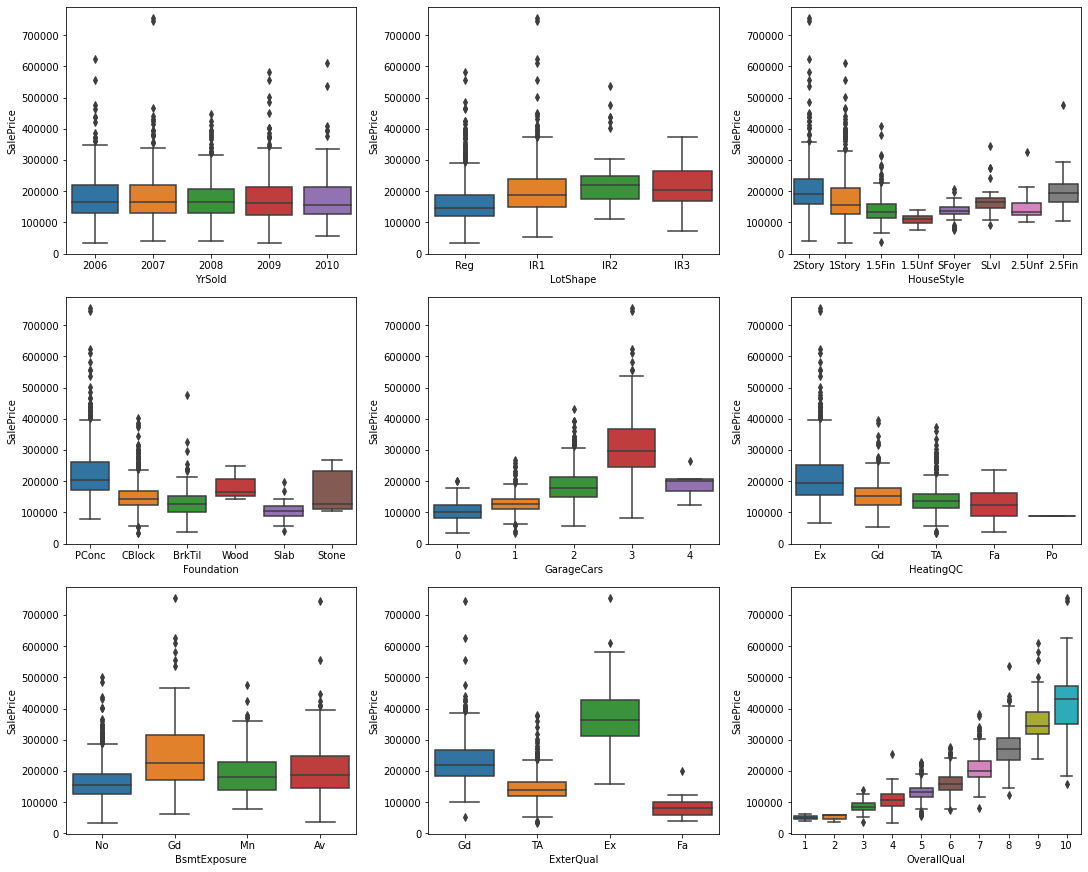

In [23]:
# understanding the categorical features
fig, axes = plt.subplots(3, 3, figsize=(15, 12), constrained_layout=True)

sns.boxplot(y=raw_data.SalePrice, x=raw_data.YrSold, data=raw_data, ax=axes[0,0])

sns.boxplot(y=raw_data.SalePrice, x=raw_data.LotShape, data=raw_data, ax=axes[0,1])

sns.boxplot(y=raw_data.SalePrice, x=raw_data.HouseStyle, data=raw_data, ax=axes[0,2])

sns.boxplot(y=raw_data.SalePrice, x=raw_data.Foundation, data=raw_data, ax=axes[1,0])

sns.boxplot(y=raw_data.SalePrice, x=raw_data.GarageCars, data=raw_data, ax=axes[1,1])

sns.boxplot(y=raw_data.SalePrice, x=raw_data.HeatingQC, data=raw_data, ax=axes[1,2])

sns.boxplot(y=raw_data.SalePrice, x=raw_data.BsmtExposure, data=raw_data, ax=axes[2,0])

sns.boxplot(y=raw_data.SalePrice, x=raw_data.ExterQual, data=raw_data, ax=axes[2,1])

sns.boxplot(y=raw_data.SalePrice, x=raw_data.OverallQual, data=raw_data, ax=axes[2,2])

plt.show()

**Key Observations**

- House prices did not rise over the years as the median house price across the years remains the same.

- House prices for irregular plot/property seems to be higher than the property with regualar shape.

- 1st and 2nd story house have higher prices compared to any other category.

- Cinder block seems to be the preffered foundation and are the most expensive houses.

- houses with excellent heating quality seems to be the preferred choice and priced higher in the market.

- People prefer houses that have good basement exposure.

- Sale price seems to be highly proportional to the overall quality of the houses.

# 4: Data Prepartion <a name="4"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [24]:
X = raw_data.drop('SalePrice', axis=1)
y = raw_data['SalePrice']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42 )

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 615 to 1126
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotShape      978 non-null    object 
 1   LotConfig     978 non-null    object 
 2   Neighborhood  978 non-null    object 
 3   HouseStyle    978 non-null    object 
 4   RoofStyle     978 non-null    object 
 5   Exterior1st   978 non-null    object 
 6   Exterior2nd   978 non-null    object 
 7   MasVnrType    976 non-null    object 
 8   ExterQual     978 non-null    object 
 9   Foundation    978 non-null    object 
 10  BsmtQual      953 non-null    object 
 11  BsmtExposure  953 non-null    object 
 12  BsmtFinType1  953 non-null    object 
 13  HeatingQC     978 non-null    object 
 14  KitchenQual   978 non-null    object 
 15  GarageType    925 non-null    object 
 16  GarageFinish  925 non-null    object 
 17  BsmtFullBath  978 non-null    object 
 18  FullBath      978 non-null 

In [27]:
## seprating numberical and categorical columns to perfrom imputation
X_train_numberic = X_train.select_dtypes(include=['number'])
X_train_cat = X_train.select_dtypes(include=['object'])

In [28]:
print(X_train_cat.shape, X_train_numberic.shape)

(978, 23) (978, 20)


In [29]:
pd.set_option('display.max_column', None)
X_train_numberic.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,MoSold
615,85,80.0,8800,6,7,1963,1963,156.0,763,173,936,1054,0,1054,3,6,480,120,0,5
613,20,70.0,8402,5,5,2007,2007,0.0,206,914,1120,1120,0,1120,3,6,0,0,30,12
1303,20,73.0,8688,7,5,2005,2005,228.0,0,1616,1616,1616,0,1616,3,7,834,208,59,4
486,20,79.0,10289,5,7,1965,1965,168.0,836,237,1073,1073,0,1073,3,6,515,0,0,6
561,20,77.0,10010,5,5,1974,1975,0.0,1071,195,1389,1389,0,1389,2,6,418,240,38,4


## Imputing numberical columns

In [30]:
X_train_numberic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 615 to 1126
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    978 non-null    int64  
 1   LotFrontage   795 non-null    float64
 2   LotArea       978 non-null    int64  
 3   OverallQual   978 non-null    int64  
 4   OverallCond   978 non-null    int64  
 5   YearBuilt     978 non-null    int64  
 6   YearRemodAdd  978 non-null    int64  
 7   MasVnrArea    976 non-null    float64
 8   BsmtFinSF1    978 non-null    int64  
 9   BsmtUnfSF     978 non-null    int64  
 10  TotalBsmtSF   978 non-null    int64  
 11  1stFlrSF      978 non-null    int64  
 12  2ndFlrSF      978 non-null    int64  
 13  GrLivArea     978 non-null    int64  
 14  BedroomAbvGr  978 non-null    int64  
 15  TotRmsAbvGrd  978 non-null    int64  
 16  GarageArea    978 non-null    int64  
 17  WoodDeckSF    978 non-null    int64  
 18  OpenPorchSF   978 non-null 

In [31]:
X_train_numberic.isnull().sum()

MSSubClass        0
LotFrontage     183
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        2
BsmtFinSF1        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BedroomAbvGr      0
TotRmsAbvGrd      0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
MoSold            0
dtype: int64

In [32]:
X_train_numberic.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,978.0,57.223926,42.873836,20.0,20.00,50.0,70.00,190.0
LotFrontage,795.0,70.284277,25.532805,21.0,59.50,70.0,80.00,313.0
LotArea,978.0,10743.494888,11556.193985,1300.0,7544.50,9579.5,11616.00,215245.0
OverallQual,978.0,6.119632,1.370475,1.0,5.00,6.0,7.00,10.0
OverallCond,978.0,5.567485,1.113813,1.0,5.00,5.0,6.00,9.0
YearBuilt,978.0,1971.007157,30.752902,1872.0,1953.00,1972.0,2001.00,2010.0
YearRemodAdd,978.0,1984.848671,20.760308,1950.0,1966.00,1994.0,2004.00,2010.0
MasVnrArea,976.0,107.389344,175.043584,0.0,0.00,0.0,171.00,1378.0
BsmtFinSF1,978.0,448.719836,459.981913,0.0,0.00,395.5,727.00,5644.0
BsmtUnfSF,978.0,568.861963,444.189087,0.0,223.00,480.5,807.50,2336.0


**Key Decision**

- For the column LotFrontage mean seems to be good way to substitue missing values as around 50% of the column values have values around 70


In [33]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_numberic_imputed = pd.DataFrame(imp_mean.fit_transform(X_train_numberic), columns = X_train_numberic.columns)

In [34]:
X_train_numberic_imputed.isnull().sum()

MSSubClass      0
LotFrontage     0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BedroomAbvGr    0
TotRmsAbvGrd    0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
MoSold          0
dtype: int64

In [35]:
X_train_numberic_imputed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,MoSold
0,85.0,80.0,8800.0,6.0,7.0,1963.0,1963.0,156.0,763.0,173.0,936.0,1054.0,0.0,1054.0,3.0,6.0,480.0,120.0,0.0,5.0
1,20.0,70.0,8402.0,5.0,5.0,2007.0,2007.0,0.0,206.0,914.0,1120.0,1120.0,0.0,1120.0,3.0,6.0,0.0,0.0,30.0,12.0
2,20.0,73.0,8688.0,7.0,5.0,2005.0,2005.0,228.0,0.0,1616.0,1616.0,1616.0,0.0,1616.0,3.0,7.0,834.0,208.0,59.0,4.0
3,20.0,79.0,10289.0,5.0,7.0,1965.0,1965.0,168.0,836.0,237.0,1073.0,1073.0,0.0,1073.0,3.0,6.0,515.0,0.0,0.0,6.0
4,20.0,77.0,10010.0,5.0,5.0,1974.0,1975.0,0.0,1071.0,195.0,1389.0,1389.0,0.0,1389.0,2.0,6.0,418.0,240.0,38.0,4.0


## Scaling numberical columns

In [36]:
# scaling the data between 0 and 1
scaler = MinMaxScaler()
X_train_numberic_scaled = pd.DataFrame(scaler.fit_transform(X_train_numberic_imputed), columns = X_train_numberic_imputed.columns)
X_train_numberic_scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,MoSold
0,0.382353,0.202055,0.035056,0.555556,0.75,0.659420,0.216667,0.113208,0.135188,0.074058,0.153191,0.165213,0.0,0.135644,0.375,0.333333,0.338505,0.140023,0.000000,0.363636
1,0.000000,0.167808,0.033195,0.444444,0.50,0.978261,0.950000,0.000000,0.036499,0.391267,0.183306,0.180358,0.0,0.148078,0.375,0.333333,0.000000,0.000000,0.054845,1.000000
2,0.000000,0.178082,0.034532,0.666667,0.50,0.963768,0.916667,0.165457,0.000000,0.691781,0.264484,0.294172,0.0,0.241522,0.375,0.416667,0.588152,0.242707,0.107861,0.272727
3,0.000000,0.198630,0.042015,0.444444,0.75,0.673913,0.250000,0.121916,0.148122,0.101455,0.175614,0.169573,0.0,0.139224,0.375,0.333333,0.363188,0.000000,0.000000,0.454545
4,0.000000,0.191781,0.040711,0.444444,0.50,0.739130,0.416667,0.000000,0.189759,0.083476,0.227332,0.242084,0.0,0.198757,0.250,0.333333,0.294781,0.280047,0.069470,0.272727


## Imputing categorical values

In [37]:
X_train_cat.shape

(978, 23)

In [38]:
X_train_cat.isnull().sum()

LotShape         0
LotConfig        0
Neighborhood     0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       2
ExterQual        0
Foundation       0
BsmtQual        25
BsmtExposure    25
BsmtFinType1    25
HeatingQC        0
KitchenQual      0
GarageType      53
GarageFinish    53
BsmtFullBath     0
FullBath         0
HalfBath         0
Fireplaces       0
GarageCars       0
YrSold           0
dtype: int64

In [39]:
X_train_cat = X_train_cat.where(pd.notnull(X_train_cat), None)

In [40]:
imp_median = SimpleImputer(missing_values=None, strategy='most_frequent')
X_train_cat = pd.DataFrame(imp_median.fit_transform(X_train_cat), columns = X_train_cat.columns)
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotShape      978 non-null    object
 1   LotConfig     978 non-null    object
 2   Neighborhood  978 non-null    object
 3   HouseStyle    978 non-null    object
 4   RoofStyle     978 non-null    object
 5   Exterior1st   978 non-null    object
 6   Exterior2nd   978 non-null    object
 7   MasVnrType    978 non-null    object
 8   ExterQual     978 non-null    object
 9   Foundation    978 non-null    object
 10  BsmtQual      978 non-null    object
 11  BsmtExposure  978 non-null    object
 12  BsmtFinType1  978 non-null    object
 13  HeatingQC     978 non-null    object
 14  KitchenQual   978 non-null    object
 15  GarageType    978 non-null    object
 16  GarageFinish  978 non-null    object
 17  BsmtFullBath  978 non-null    object
 18  FullBath      978 non-null    object
 19  HalfBath

In [41]:
X_train_cat.head()

,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageCars,YrSold
0,Reg,Inside,NAmes,SFoyer,Gable,MetalSd,MetalSd,BrkFace,TA,PConc,TA,Gd,GLQ,Ex,Gd,Attchd,RFn,1,1,0,0,2,2010
1,Reg,Inside,Mitchel,1Story,Gable,VinylSd,VinylSd,None,TA,PConc,Gd,No,ALQ,Ex,TA,Attchd,Unf,0,1,0,0,0,2007
2,Reg,Inside,Somerst,1Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,Unf,Ex,Gd,Attchd,RFn,0,2,0,0,3,2006
3,Reg,Inside,NAmes,1Story,Hip,MetalSd,MetalSd,BrkFace,TA,CBlock,TA,No,ALQ,TA,TA,Attchd,RFn,1,1,1,0,2,2007
4,Reg,Inside,Mitchel,1Story,Gable,HdBoard,HdBoard,None,TA,CBlock,Gd,Av,ALQ,Gd,TA,Attchd,RFn,1,1,0,1,2,2006


In [42]:
X_train_cat.shape

(978, 23)

In [43]:
X_train_cat.columns

Index(['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'Fireplaces', 'GarageCars', 'YrSold'],
      dtype='object')

In [44]:
## columns to be one hot encoded
dummeies_cat_cols = ['LotConfig','MasVnrType',\
                     'GarageType','FullBath','HalfBath','Fireplaces','GarageCars']

## column to be encoded orinally
ordinal_cat_cols = ['LotShape', 'ExterQual', 'BsmtQual',\
                    'BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual',\
                    'GarageFinish','YrSold']

## I choose to remove these column as they add sprasity and make the model complex
high_cardinal_cols = ['Neighborhood',  'Exterior1st',\
                      'Exterior2nd', 'HouseStyle', 'RoofStyle','Foundation','BsmtFullBath']

In [45]:
print(len(dummeies_cat_cols), len(ordinal_cat_cols), len(high_cardinal_cols))

7 9 7


In [46]:
## dropping columns of high cardinality
X_train_cat = X_train_cat.drop(labels=high_cardinal_cols, axis=1)
X_train_cat.shape

(978, 16)

## Ordinal encoding

In [47]:
## performing ordinal and one hot encoding
enc = OrdinalEncoder()
X_train_cat_ordinal = pd.DataFrame(enc.fit_transform(X_train_cat[ordinal_cat_cols]), columns = X_train_cat[ordinal_cat_cols].columns)
X_train_cat_ordinal.head()

,LotShape,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageFinish,YrSold
0,3.0,3.0,3.0,1.0,2.0,0.0,2.0,1.0,4.0
1,3.0,3.0,2.0,3.0,0.0,0.0,3.0,2.0,1.0
2,3.0,2.0,2.0,0.0,5.0,0.0,2.0,1.0,0.0
3,3.0,3.0,3.0,3.0,0.0,4.0,3.0,1.0,1.0
4,3.0,3.0,2.0,0.0,0.0,2.0,3.0,1.0,0.0


## One hot encoding

In [48]:
# Convert into dummies
X_train_dummies = pd.get_dummies(X_train_cat[dummeies_cat_cols], drop_first=True)
X_train_dummies.head()

,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4
0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [49]:
X_train_dummies.shape

(978, 24)

##Mergeing the dataframes

In [50]:
# Merging the dataframes
X_train = pd.concat([X_train_numberic_scaled, X_train_dummies,X_train_cat_ordinal], axis=1)
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,LotShape,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageFinish,YrSold
0,0.382353,0.202055,0.035056,0.555556,0.75,0.659420,0.216667,0.113208,0.135188,0.074058,0.153191,0.165213,0.0,0.135644,0.375,0.333333,0.338505,0.140023,0.000000,0.363636,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,3.0,3.0,3.0,1.0,2.0,0.0,2.0,1.0,4.0
1,0.000000,0.167808,0.033195,0.444444,0.50,0.978261,0.950000,0.000000,0.036499,0.391267,0.183306,0.180358,0.0,0.148078,0.375,0.333333,0.000000,0.000000,0.054845,1.000000,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.0,3.0,2.0,3.0,0.0,0.0,3.0,2.0,1.0
2,0.000000,0.178082,0.034532,0.666667,0.50,0.963768,0.916667,0.165457,0.000000,0.691781,0.264484,0.294172,0.0,0.241522,0.375,0.416667,0.588152,0.242707,0.107861,0.272727,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,3.0,2.0,2.0,0.0,5.0,0.0,2.0,1.0,0.0
3,0.000000,0.198630,0.042015,0.444444,0.75,0.673913,0.250000,0.121916,0.148122,0.101455,0.175614,0.169573,0.0,0.139224,0.375,0.333333,0.363188,0.000000,0.000000,0.454545,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,3.0,3.0,3.0,3.0,0.0,4.0,3.0,1.0,1.0
4,0.000000,0.191781,0.040711,0.444444,0.50,0.739130,0.416667,0.000000,0.189759,0.083476,0.227332,0.242084,0.0,0.198757,0.250,0.333333,0.294781,0.280047,0.069470,0.272727,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,3.0,3.0,2.0,0.0,0.0,2.0,3.0,1.0,0.0


In [51]:
X_train.shape

(978, 53)

## Perparing the test data

In [52]:
## seprating numberical and categorical columns
num_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold']

cat_cols = ['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'Fireplaces', 'GarageCars', 'YrSold']
X_test_numberic = X_test[num_cols]
X_test_cat = X_test[cat_cols]

print(X_test_numberic.shape, X_test_cat.shape)

(482, 20) (482, 23)


In [53]:
## Imputing numberical cols
X_test_numberic_imputed = pd.DataFrame(imp_mean.transform(X_test_numberic), columns = X_test_numberic.columns)

# scaling the data between 0 and 1
X_test_numberic_scaled = pd.DataFrame(scaler.transform(X_test_numberic_imputed), columns = X_test_numberic_imputed.columns)

# imputing categorical columns
X_test_cat = X_test_cat.where(pd.notnull(X_test_cat), None)
X_test_cat = pd.DataFrame(imp_median.transform(X_test_cat), columns = X_test_cat.columns)

In [54]:
X_test_cat = X_test_cat.drop(labels=high_cardinal_cols, axis=1)

In [55]:
# Ordinal encoding
X_test_cat_ordinal = pd.DataFrame(enc.transform(X_test_cat[ordinal_cat_cols]), columns = X_test_cat[ordinal_cat_cols].columns)

# one hot encoding
X_test_dummies = pd.get_dummies(X_test_cat[dummeies_cat_cols], drop_first=True)

# merging the dataframes
# Merging the dataframes
X_test = pd.concat([X_test_numberic_scaled, X_test_dummies,X_test_cat_ordinal], axis=1)
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,LotShape,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageFinish,YrSold
0,0.000000,0.167808,0.033252,0.555556,0.875,0.659420,0.883333,0.000000,0.117470,0.169521,0.173322,0.168426,0.000000,0.138282,0.375,0.333333,0.186178,0.224037,0.000000,0.090909,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,3.0,3.0,3.0,3.0,2.0,4.0,3.0,1.0,0.0
1,0.235294,0.263699,0.051209,0.777778,0.500,0.884058,0.750000,0.262700,0.182849,0.184503,0.239444,0.267554,0.617162,0.431047,0.375,0.583333,0.502116,0.217036,0.058501,0.272727,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,1.0,4.0
2,0.058824,0.119863,0.035804,0.444444,0.625,0.398551,0.000000,0.000000,0.000000,0.431507,0.164975,0.159247,0.000000,0.130746,0.250,0.250000,0.253879,0.000000,0.000000,0.181818,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,3.0,3.0,3.0,3.0,5.0,2.0,3.0,2.0,4.0
3,0.176471,0.099315,0.017294,0.555556,0.750,0.543478,0.000000,0.000000,0.070695,0.258990,0.164321,0.153740,0.363036,0.250565,0.375,0.416667,0.296192,0.000000,0.043876,0.818182,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,3.0,3.0,3.0,3.0,0.0,0.0,3.0,2.0,0.0
4,0.000000,0.232877,0.054210,0.888889,0.500,0.978261,0.966667,0.050798,0.181077,0.255993,0.265139,0.295089,0.000000,0.242276,0.250,0.333333,0.643159,0.266044,0.000000,0.727273,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0


In [56]:
X_test.shape

(482, 53)

In [57]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'FullBath_1', 'FullBath_2', 'FullBath_3', 'HalfBath_1', 'HalfBath_2',
       'Fireplaces_1', 'Fireplaces_2', 'Fireplaces_3', 'GarageCars_1',
       'GarageCars_2', 'GarageCars_3', 'GarageCars_4', 'LotShape', 'ExterQual',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageFinish', 'YrSold'],
      dtype='object')

In [58]:
X_test.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'FullBath_1', 'FullBath_2', 'FullBath_3', 'HalfBath_1', 'HalfBath_2',
       'Fireplaces_1', 'Fireplaces_2', 'Fireplaces_3', 'GarageCars_1',
       'GarageCars_2', 'GarageCars_3', 'GarageCars_4', 'LotShape', 'ExterQual',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageFinish', 'YrSold'],
      dtype='object')

In [59]:
print(X_train.shape, X_test.shape)

(978, 53) (482, 53)


# 5: Model Building and Evaluations <a name="5"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [60]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          482 non-null    float64
 1   LotFrontage         482 non-null    float64
 2   LotArea             482 non-null    float64
 3   OverallQual         482 non-null    float64
 4   OverallCond         482 non-null    float64
 5   YearBuilt           482 non-null    float64
 6   YearRemodAdd        482 non-null    float64
 7   MasVnrArea          482 non-null    float64
 8   BsmtFinSF1          482 non-null    float64
 9   BsmtUnfSF           482 non-null    float64
 10  TotalBsmtSF         482 non-null    float64
 11  1stFlrSF            482 non-null    float64
 12  2ndFlrSF            482 non-null    float64
 13  GrLivArea           482 non-null    float64
 14  BedroomAbvGr        482 non-null    float64
 15  TotRmsAbvGrd        482 non-null    float64
 16  GarageAr

## Implementing RFE

In [61]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=10)

#===========================================================================
# perform a scikit-learn Recursive Feature Elimination (RFE)
#===========================================================================
# here we want only one final feature, we do this to produce a ranking
n_features_to_select = 1
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)


#===========================================================================
# now print out the features in order of ranking
#===========================================================================
feature_list = []
from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    # print(x, y)
    feature_list.append(y)

top_15_features = X_train[feature_list[:15]]

top_15_features.head()

,OverallQual,GrLivArea,1stFlrSF,BsmtFinSF1,YearBuilt,TotalBsmtSF,GarageArea,LotArea,YearRemodAdd,2ndFlrSF,BsmtQual,GarageFinish,WoodDeckSF,OpenPorchSF,GarageCars_3
0,0.555556,0.135644,0.165213,0.135188,0.659420,0.153191,0.338505,0.035056,0.216667,0.0,3.0,1.0,0.140023,0.000000,0
1,0.444444,0.148078,0.180358,0.036499,0.978261,0.183306,0.000000,0.033195,0.950000,0.0,2.0,2.0,0.000000,0.054845,0
2,0.666667,0.241522,0.294172,0.000000,0.963768,0.264484,0.588152,0.034532,0.916667,0.0,2.0,1.0,0.242707,0.107861,1
3,0.444444,0.139224,0.169573,0.148122,0.673913,0.175614,0.363188,0.042015,0.250000,0.0,3.0,1.0,0.000000,0.000000,0
4,0.444444,0.198757,0.242084,0.189759,0.739130,0.227332,0.294781,0.040711,0.416667,0.0,2.0,1.0,0.280047,0.069470,0


In [62]:
top_15_features.shape

(978, 15)

In [63]:
top_15_features.columns

Index(['OverallQual', 'GrLivArea', '1stFlrSF', 'BsmtFinSF1', 'YearBuilt',
       'TotalBsmtSF', 'GarageArea', 'LotArea', 'YearRemodAdd', '2ndFlrSF',
       'BsmtQual', 'GarageFinish', 'WoodDeckSF', 'OpenPorchSF',
       'GarageCars_3'],
      dtype='object')

## Linear Regression

In [64]:
reg = LinearRegression().fit(top_15_features, y_train)

In [81]:
def get_error_stats(y,y_pred,name,DoPrint=True):
    RMSE = mean_squared_error(y, y_pred, squared=False)
    MAE = mean_absolute_error(y, y_pred)
    R2 = r2_score(y, y_pred)
    if DoPrint:
        print(F"RMSE {name} {RMSE}")
        print(F"MAE Score {name} {MAE}")
        print(F"R2 Score {name} {R2} \n")
    return RMSE,MAE,R2

In [82]:
print("Number of non-zero Coefficients {}".format(np.sum(reg.coef_!=0)))
y_pred_train = reg.predict(top_15_features)
get_error_stats(y_train,y_pred_train,'Train')

y_pred_test = reg.predict(X_test[top_15_features.columns])
get_error_stats(y_test,y_pred_test, 'Test')

Number of non-zero Coefficients 15
RMSE Train 34067.59874586357
MAE Score Train 20610.663713902133
R2 Score Train 0.799787401680481 

RMSE Test 35100.786466788566
MAE Score Test 21619.012759234796
R2 Score Test 0.8321755168644748 



(35100.786466788566, 21619.012759234796, 0.8321755168644748)

## Ridge and Lasso Regression

In [83]:
alphas = np.array([0.01, 
                    0.001, 
                    0.0001, 
                    0.0002, 
                    0.0003, 
                    0.0004, 
                    0.0005])
 
# Create a parameter grid dictionary with hyperparameter values
paramgrid = {'alpha': alphas}
 
# Instantiate a Lasso regularized model 
model = Lasso()
 
# Instantiate the GridSearchCV method
grid = GridSearchCV(estimator = model, param_grid = paramgrid)
 
# Fit the data into model using GridSearchCV
grid.fit(top_15_features, y_train)
 
# Get the best score of Lasso regression model and print it
print('\n')
print('*' * 100)
print("The best score of the model using Lasso regresssion and given alpha values is: {0}".format(grid.best_score_))
print('*' * 100)
print('\n')
 
# Get the best score of hyperparameter alpha for Lasso regression and print it
print('*' * 100)
print("The best hyperparameter value for alpha for Lasso regression is: {0}".format(grid.best_estimator_.alpha))
print('*' * 100)
print('\n')

# print("Number of non-zero Coefficients {}".format(np.sum(grid.coef_!=0)))
y_pred_train = grid.best_estimator_.predict(top_15_features)
get_error_stats(y_train,y_pred_train, 'Train')

y_pred_test = grid.best_estimator_.predict(X_test[top_15_features.columns])
get_error_stats(y_test,y_pred_test, 'Test')



****************************************************************************************************
The best score of the model using Lasso regresssion and given alpha values is: 0.774011769791898
****************************************************************************************************


****************************************************************************************************
The best hyperparameter value for alpha for Lasso regression is: 0.01
****************************************************************************************************


RMSE Train 34067.59875264632
MAE Score Train 20610.620118758892
R2 Score Train 0.7997874016007576 

RMSE Test 35100.68792730737
MAE Score Test 21618.84478990326
R2 Score Test 0.8321764591404721 



(35100.68792730737, 21618.84478990326, 0.8321764591404721)

In [84]:
alphas = np.array([0.01, 
                    0.001, 
                    0.0001, 
                    0.0002, 
                    0.0003, 
                    0.0004, 
                    0.0005])
 
# Create a parameter grid dictionary with hyperparameter values
paramgrid = {'alpha': alphas}
 
# Instantiate a Lasso regularized model 
model = Ridge()
 
# Instantiate the GridSearchCV method
grid = GridSearchCV(estimator = model, param_grid = paramgrid)
 
# Fit the data into model using GridSearchCV
grid.fit(top_15_features, y_train)
 
# Get the best score of Lasso regression model and print it
print('\n')
print('*' * 100)
print("The best score of the model using Ridge regresssion and given alpha values is: {0}".format(grid.best_score_))
print('*' * 100)
print('\n')
 
# Get the best score of hyperparameter alpha for Lasso regression and print it
print('*' * 100)
print("The best hyperparameter value for alpha for Ridge regression is: {0}".format(grid.best_estimator_.alpha))
print('*' * 100)
print('\n')

# print("Number of non-zero Coefficients {}".format(np.sum(grid.coef_!=0)))
y_pred_train = grid.best_estimator_.predict(top_15_features)
get_error_stats(y_train,y_pred_train, 'Train')

y_pred_test = grid.best_estimator_.predict(X_test[top_15_features.columns])
get_error_stats(y_test,y_pred_test, 'Test')



****************************************************************************************************
The best score of the model using Ridge regresssion and given alpha values is: 0.7744479517078039
****************************************************************************************************


****************************************************************************************************
The best hyperparameter value for alpha for Ridge regression is: 0.01
****************************************************************************************************


RMSE Train 34068.00199682802
MAE Score Train 20608.062687819292
R2 Score Train 0.7997826619040267 

RMSE Test 35082.667167995096
MAE Score Test 21594.065129975916
R2 Score Test 0.8323487367494127 



(35082.667167995096, 21594.065129975916, 0.8323487367494127)

# 6: Summary & Conclusion <a name="6"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

- Following are the top 5 features impacting the model performance
  - 'OverallQual'
  - 'GrLivArea'
  - '1stFlrSF'
  - 'BsmtFinSF1'
  - 'YearBuilt'

- Ridge and lasso regression results are similar. Ridge seems to have perfromed slight better.

- The average R2 score is 80%. There are scope for further improvement.

# 7: Reference <a name="7"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

- Pandas - https://pandas.pydata.org/
- Matplotlib - https://matplotlib.org/stable/index.html
- Seaborn - https://seaborn.pydata.org/
- sklearn - https://scikit-learn.org/stable/